In [11]:
import pandas as pd
import math 
import numpy as np
from sklearn import preprocessing, model_selection, svm 
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [12]:
df = pd.read_csv('GOOGL.csv',
                  header=0, 
                  index_col='Date',
                  parse_dates=True)
df = df[['Open','High','Low','Close','Volume',]]
df['HL_PCT'] = (df['High']-df['Close'])/df['Close'] * 100
df['PCT_change'] = (df['Close']-df['Open'])/df['Open'] * 100
df = df[['Close','HL_PCT','PCT_change','Volume']]
forecast_col = 'Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [13]:
df.head()

,Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2009-05-22,196.946945,1.308767,-0.796656,3433700,212.872879
2009-05-26,202.382385,0.158271,3.166221,6202700,212.282288
2009-05-27,202.982986,1.553408,-0.019722,6062500,211.006012
2009-05-28,205.405411,0.297271,0.420872,5332200,209.704712
2009-05-29,208.823822,0.000000,1.242386,5291100,204.449448


In [14]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs = 0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [15]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1185.56941566 1156.39669541 1151.01689088 1139.95628879 1144.71579293
 1147.61723372 1159.25974034 1141.46200785 1158.05253994 1171.69240408
 1183.4774012  1184.63456858 1189.89218928 1216.88672957 1221.28763205
 1215.28417143 1230.84271911 1230.27167921 1218.55432631 1216.28576654
 1225.36720629 1271.63490704 1291.63359311 1300.56454367] 0.9807513214838163 24


In [16]:
style.use('ggplot')

In [17]:
df['Forecast'] = np.nan

In [18]:
last_date = df.iloc[-1].name

In [20]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [24]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [26]:
df.tail()

,Close,HL_PCT,PCT_change,Volume,label,Forecast
Date,,,,,,
2018-08-15 08:00:00,NaN,NaN,NaN,NaN,NaN,1216.285767
2018-08-16 08:00:00,NaN,NaN,NaN,NaN,NaN,1225.367206
2018-08-17 08:00:00,NaN,NaN,NaN,NaN,NaN,1271.634907
2018-08-18 08:00:00,NaN,NaN,NaN,NaN,NaN,1291.633593
2018-08-19 08:00:00,NaN,NaN,NaN,NaN,NaN,1300.564544


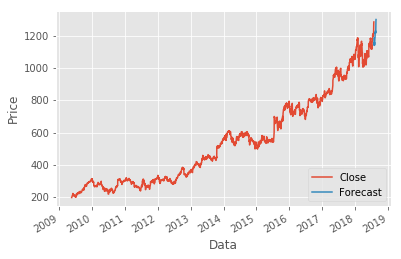

In [27]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()